In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd '/content/drive/MyDrive/celebrity classifier'

/content/drive/MyDrive/celebrity classifier


In [3]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras import Sequential, layers, models
#from tensorflow.keras.preparocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [ ]:
def img_list(path):
    image_path_list = []
    for i in os.listdir(path):
        full_path = os.path.join(path, i)
        image_path_list.append(full_path)
    return image_path_list

In [ ]:
einstein_path = 'einstein_2nd'
elon_path = 'elon musk'
ronaldinho_path = 'ronaldinho'

In [ ]:
ronaldinho_directories = img_list(ronaldinho_path)
einstein_directories = img_list(einstein_path)
elon_directories = img_list(elon_path)

In [ ]:
classes = {
    'ronaldinho' : 0,
    'einstein' : 1,
    'elon musk' : 2
}


celebrity_json = {
    'ronaldinho' : ronaldinho_directories,
    'einstein' : einstein_directories,
    'elon musk' : elon_directories
}

In [ ]:
X, y = [], []
for celebs, training_files in celebrity_json.items():
    for img in training_files:
        image = cv2.imread(img)
        if image is None:
            continue
        reshaped_image = cv2.resize(image, (200,200))
        X.append(reshaped_image)
        y.append(classes[celebs])

In [ ]:
X_arr = np.array(X)
y_arr = np.array(y)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_arr, y_arr, test_size = 0.2, random_state=20)
x_train = x_train/255
x_test = x_test/255

In [ ]:
model = models.Sequential([
    layers.Conv2D(100, kernel_size=(2,2), activation='relu', input_shape=(200,200,3)),
    layers.MaxPooling2D((2,2)), 
    
    
    layers.Conv2D(70, kernel_size=(2,2), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(50, kernel_size=(2,2), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(30, kernel_size=(2,2), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    
    layers.Flatten(),
    #layers.Dense(200, activation='relu'),
    layers.Dense(300, activation='relu'),
    layers.Dense(150, activation='relu'),
    layers.Dense(120, activation='relu'),
    layers.Dense(100, activation='relu'),
    layers.Dense(80, activation='relu'),
    layers.Dense(50, activation='relu'),
    layers.Dense(20, activation='relu'),
    layers.Dense(3, activation='softmax')
    
])


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=9, batch_size=15, validation_data=(x_test, y_test))

Epoch 1/9
42/42 [==============================] - 66s 2s/step - loss: 0.9877 - accuracy: 0.4863 - val_loss: 0.8246 - val_accuracy: 0.6538
Epoch 2/9
42/42 [==============================] - 65s 2s/step - loss: 0.7409 - accuracy: 0.6924 - val_loss: 1.2077 - val_accuracy: 0.5064
Epoch 3/9
42/42 [==============================] - 64s 2s/step - loss: 0.8052 - accuracy: 0.6522 - val_loss: 0.5811 - val_accuracy: 0.7436
Epoch 4/9
42/42 [==============================] - 64s 2s/step - loss: 0.6200 - accuracy: 0.7488 - val_loss: 0.6744 - val_accuracy: 0.6538
Epoch 5/9
42/42 [==============================] - 64s 2s/step - loss: 0.4976 - accuracy: 0.8084 - val_loss: 0.4550 - val_accuracy: 0.8397
Epoch 6/9
42/42 [==============================] - 64s 2s/step - loss: 0.4409 - accuracy: 0.8374 - val_loss: 0.5137 - val_accuracy: 0.8269
Epoch 7/9
42/42 [==============================] - 64s 2s/step - loss: 0.3158 - accuracy: 0.8953 - val_loss: 0.4641 - val_accuracy: 0.8141
Epoch 8/9
42/42 [==========

In [ ]:
model.evaluate(x_test, y_test)

5/5 [==============================] - 4s 744ms/step - loss: 0.3547 - accuracy: 0.9103


[0.3547102212905884, 0.9102563858032227]

In [ ]:
if os.path.isfile('/content/drive/MyDrive/celebrity classifier/new_model.h5') is False:
  model.save('/content/drive/MyDrive/celebrity classifier/new_model.h5')

In [ ]:
model.predict(np.expand_dims(x_test[100], axis=0)).argmax()

1

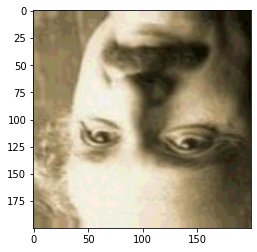

In [ ]:
plt.imshow(x_test[100])